# Restaurant Training Model
Splitting POIs dataset into different categories has the potential to increase the prediction of accessibility. 
Models for different categories can be trained independently with different features that are more representative for certain types of POIs. For example, for the restaurant POIs, features such as cuisines of restaurants, brands of restaurants can infer the level of restaurants, therefore, infer the accessibility information. For supermarket POIs, brands of supermarkets could be an informative feature because certain supermarkets may have invested in more accessible facilities compared to others. These features may not necessarily be useful for toilet POIs, train station POIs, etc.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [29]:
rest_df = pd.read_pickle("/shared/04_22_Restaurant Model/restaurants_accessible_cleaned_updated.pkl")
lonlat=rest_df[['lon','lat']]
rest_df.head()

,wheelchair,lon,lat,normalized_numofResturant,normalized_numofcity,normalized_cuisine_cat,numOfaccessiblePoiNearby_100m,numOfaccessiblePoiNearby_1000m
4082701,yes,-0.492195,52.160205,0.000613,0.000613,0.000000,1.0,3.0
6721878,yes,-0.444455,52.133114,0.011642,0.001225,0.170343,1.0,3.0
18351898,yes,0.190265,52.203193,0.000613,0.007966,0.236520,2.0,2.0
20940247,no,0.113019,52.212130,0.000613,0.007966,0.236520,1.0,55.0
22533343,limited,-2.617820,53.639840,0.000613,0.000000,0.131127,0.0,2.0


In [30]:
rest_df['wheelchair']=rest_df['wheelchair'].replace(['limited','designated'],'no')
rest_df['wheelchair'] = pd.Categorical(rest_df['wheelchair'])
rest_y = rest_df['wheelchair'].cat.codes
rest_y.value_counts()

1    915
0    717
dtype: int64

In [31]:
rest_x = rest_df.drop(columns='wheelchair')
rest_x = rest_x.drop(columns='lon')
rest_x = rest_x.drop(columns='lat')
rest_x.head()

,normalized_numofResturant,normalized_numofcity,normalized_cuisine_cat,numOfaccessiblePoiNearby_100m,numOfaccessiblePoiNearby_1000m
4082701,0.000613,0.000613,0.000000,1.0,3.0
6721878,0.011642,0.001225,0.170343,1.0,3.0
18351898,0.000613,0.007966,0.236520,2.0,2.0
20940247,0.000613,0.007966,0.236520,1.0,55.0
22533343,0.000613,0.000000,0.131127,0.0,2.0


# Training features are: 

* The normalized restaurant brand scale factor
* the cuisine of restaurant (represented by the frequency of occurrence)
* the city where the restaurant locates (represented by the frequency of occurrence)
* the number of accessible POIs within 100m
* the number of accessible POIs within 1000m


In [32]:
rest_x

,normalized_numofResturant,normalized_numofcity,normalized_cuisine_cat,numOfaccessiblePoiNearby_100m,numOfaccessiblePoiNearby_1000m
4082701,0.000613,0.000613,0.000000,1.0,3.0
6721878,0.011642,0.001225,0.170343,1.0,3.0
18351898,0.000613,0.007966,0.236520,2.0,2.0
20940247,0.000613,0.007966,0.236520,1.0,55.0
22533343,0.000613,0.000000,0.131127,0.0,2.0
...,...,...,...,...,...
8026542696,0.000613,0.111520,0.236520,1.0,6.0
8156347040,0.000613,0.000000,0.236520,1.0,14.0
8262209917,0.000613,0.004902,0.064951,1.0,7.0
8262209918,0.000613,0.004902,0.043505,1.0,2.0


In [6]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(rest_x, rest_y, test_size=0.20, random_state=42)

In [8]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=250, random_state=0)

In [9]:
importances = forest.feature_importances_

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

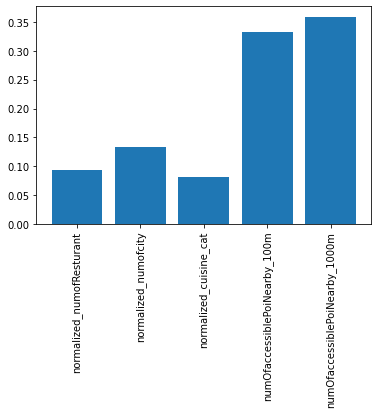

In [10]:
plt.bar(rest_x.columns, importances)
plt.xticks(rotation=90)

In [11]:
new_preds = forest.predict(X_test)
accuracy_score(y_test, new_preds)

0.7308868501529052

In [12]:
precision_recall_fscore_support(y_test, new_preds)

(array([0.70149254, 0.75129534]),
 array([0.66197183, 0.78378378]),
 array([0.68115942, 0.76719577]),
 array([142, 185]))

In [1]:
f1_score = 2 * (0.75129534 * 0.78378378)/(0.75129534 + 0.78378378)
f1_score

0.767195767058033

# Result:
### overall accuracy= 0.7308868501529052
### precision of accessible POIs prediction= 0.75129534 
i.e. when the model says the POI is accessible, 7.5 out 10 times it will be ture.
### recall of accessible POIs prediction=0.78378378


## Set up XGBoost model

In [13]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [14]:
param = {'objective': 'multi:softmax', 'num_class':7}

In [15]:
num_round = 100
bst = xgb.train(param, dtrain, num_round)

[14:38:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
dtest = xgb.DMatrix(X_test)

In [17]:
xgb_preds = bst.predict(dtest)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

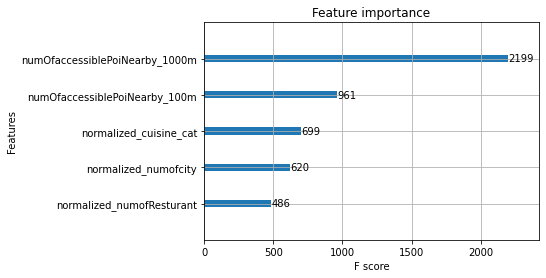

In [18]:
xgb.plot_importance(bst)

In [33]:
accuracy_score(y_test, xgb_preds)

0.7064220183486238

# Result:
### overall accuracy= 0.7064220183486238
